In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
NUM_STEPS = 10000
DECAY_STEPS = 2000

def iter_normal_egreedy(epsilon=0.1, num_steps=NUM_STEPS):
    for _ in range(num_steps):
        yield epsilon

def iter_linear_decay_egreedy(start_epsilon=1., end_epsilon=0.1, decay_steps=DECAY_STEPS, num_steps=NUM_STEPS):
    for i in range(num_steps):
        ratio = 1 - (i/decay_steps)
        e = (start_epsilon-end_epsilon)*ratio + end_epsilon
        yield np.clip(e, end_epsilon, start_epsilon)

def iter_exp_decay_egreedy(start_epsilon=1., end_epsilon=0.1, decay_steps=DECAY_STEPS, num_steps=NUM_STEPS):
    for i in range(num_steps):
        exp_e = start_epsilon * np.power(0.005, (i / decay_steps))
        yield exp_e * (start_epsilon - end_epsilon) + end_epsilon 

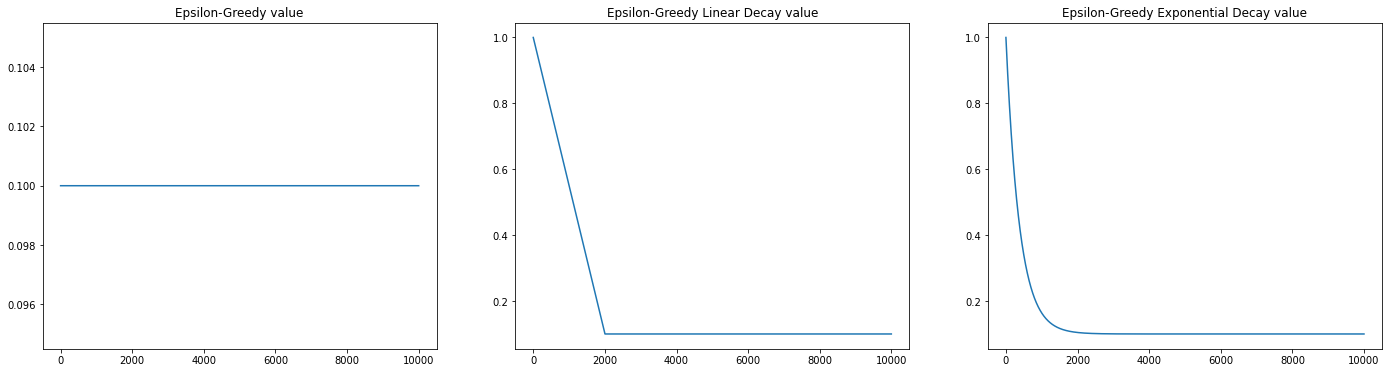

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3,figsize=(24, 6))

ax0.plot([v for v in iter_normal_egreedy()])
ax0.set_title('Epsilon-Greedy value')

ax1.plot([v for v in iter_linear_decay_egreedy()])
ax1.set_title('Epsilon-Greedy Linear Decay value')

ax2.plot([v for v in iter_exp_decay_egreedy()])
ax2.set_title('Epsilon-Greedy Exponential Decay value')
plt.show()